# Homework 6
## ECE204 Data Science & Engineering

*This notebook uses `X` for multiple problems, and that variable may end up being used for the wrong problem. To start fresh, restart the kernel in the Kernel menu or with the <span class="jp-RefreshIcon jp-Icon jp-Icon-16 jp-ToolbarButtonComponent-icon"></span> button above.*

### Import Statements

In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


---
**Problem 1.** On the MNIST dataset, **find the number of principle components that are required to explain Y%** (Y is given to you in Canvas) **of the variance.**

In [4]:
data = np.load("mnist.npz")
X = data["X"]
X.shape

(70000, 784)

In [5]:
# On the MNIST dataset, how many principal components are needed to explain 98% of the variance?
from sklearn.decomposition import PCA
est = PCA()
est.fit(X)

est = PCA(n_components = 0.98)
X_low = est.fit_transform(X)
est.n_components_, est.explained_variance_ratio_.sum()

(260, 0.9800213049893107)

In [ ]:
#solution
from sklearn.decomposition import PCA
est = PCA(n_components=0.98, random_state=42)
est.fit(X)
est.n_components_

---
**Problem 2.** Consider the MNIST dataset again. The data shape should indicate there are 70,000 samples with 784 features each. Now suppose we want to reduce the number of dimensions in this dataset by an order of magnitude, and find out how the total explained variance changes going from one case to the next.

Specifically, run PCA independently 3 times on this data reducing the data to the dimensions assigned to you in Canvas. **How much variance is explained by this many principal components?**

In [10]:
data = np.load("mnist.npz")
X = data["X"]

In [11]:
est = PCA(n_components = 200)
X_pca = est.fit_transform(X)
est.n_components_, est.explained_variance_ratio_.sum()


(200, 0.9661476597998437)

In [ ]:
#solution
pca_200 = PCA(n_components = 200, random_state=42)
pca_200.fit(X)
print(pca_200.explained_variance_ratio_.sum())

---
**Problem 3.** Suppose you have a dataset with a large number of dimensions, and want to perform clustering on it in a lower dimensional space.

On the MNIST dataset, **reduce the number of dimensions to 3 (from 784) using PCA, and then run KMeans clustering on this reduced dataset assuming 10 clusters** since we have the prior knowledge that there are 10 categories of digits in MNIST, 0-9.

**Which cluster centers are obtained through this process?** The cluster centers below are accurate to at least one unit.

`Note:` Set `random_state=42` in both KMeans and PCA. e.g., `PCA(n_components=x, random_state=42)`. This is similar to setting a random seed.



In [29]:
data = np.load("mnist.npz")
X = data["X"]
X.shape

(70000, 784)

In [30]:
from sklearn.cluster import KMeans

pca = PCA(n_components=3, random_state=42).fit_transform(X)
kmeans = KMeans (n_clusters = 10, random_state=42 )
labels_hat = kmeans.fit_predict(X_low)

cluster_centers = kmeans.cluster_centers_
cluster_centers

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[-7.58683735e+02, -2.33321712e+02, -7.04933734e+01, ...,
        -2.31426506e-01,  1.62249856e-01,  4.82899168e-01],
       [ 3.60288002e+02,  1.29771508e+02,  1.85582068e+02, ...,
         3.50673420e-01, -4.36276158e-01, -1.76766091e-01],
       [-2.62820786e+02,  5.91740685e+02,  1.88293071e+02, ...,
        -4.61508060e-02,  1.64696914e-01, -8.66408599e-01],
       ...,
       [ 5.86209020e+01, -1.51941978e+02,  5.13846494e+02, ...,
        -5.58573933e-01, -6.68478628e-01,  5.91936112e-01],
       [ 5.86822764e+01, -1.78972582e+02,  3.55067020e+01, ...,
         2.00352871e-01, -2.00666516e-01, -5.50890380e-02],
       [-7.28298897e+02, -4.92471764e+02,  2.38227370e+02, ...,
        -4.56349272e-01, -1.89333647e-01,  4.70560751e-01]])

In [33]:
#solution
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

data = np.load("mnist.npz")
X = data["X"]
X.shape

# Reduce the number of dimensions in this dataset to 3
pca = PCA(n_components = 3, random_state=42)
X_pca = pca.fit_transform(X)

# Perform clustering on this reduced dataset with K=10
km = KMeans(n_clusters = 10, random_state=42)
km_fit = km.fit(X_pca)
print("Cluster centers are:", km_fit.cluster_centers_.round(0))

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster centers are: [[ -95.  653.  338.]
 [ 763. -113.  703.]
 [ 206. -388. -738.]
 [-810. -415.  116.]
 [ 394.   59.  -16.]
 [1229. -271. -162.]
 [  68.  747. -382.]
 [-458.  283. -197.]
 [   8. -593. -126.]
 [-148. -144.  489.]]


---
**Problem 4.**
1. Perform PCA on the data (`X`) in `synthetic1.csv` with `n_components=1`. <br>
2. Now, get the inverse transform on the transformed data to reconstruct your input to it's original dimensions. Let's call this reconstructed data `X_hat`. <br>

**For sanity check**: What shape is the data in `X`, and what is the shape of `X_hat` = inverse_transform(fit_transform(X))? Ideally, `X_hat` should be similar to `X`.

**Mark all answers that are true.** <br>

`NOTE:` To visualize the data, make a scatter plot.

Shape of X: (400, 2)


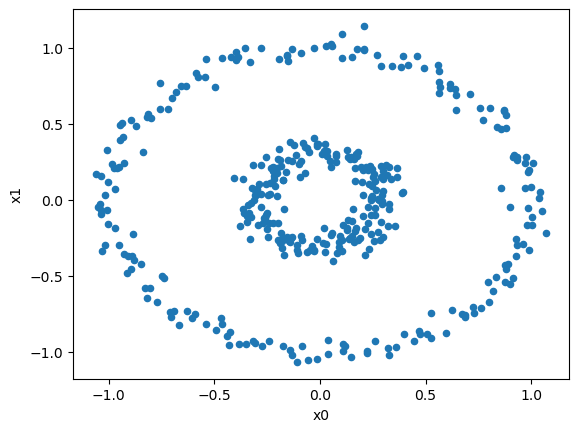

In [26]:
df_s1 = pd.read_csv("synthetic1.csv")

# Use X for PCA 
X = df_s1.values
print("Shape of X:", X.shape)

df_s1.head()
ax = df_s1.plot.scatter(x = "x0", y = "x1")

Shape of X: (400, 2)
Shape of X_hat: (400, 2)


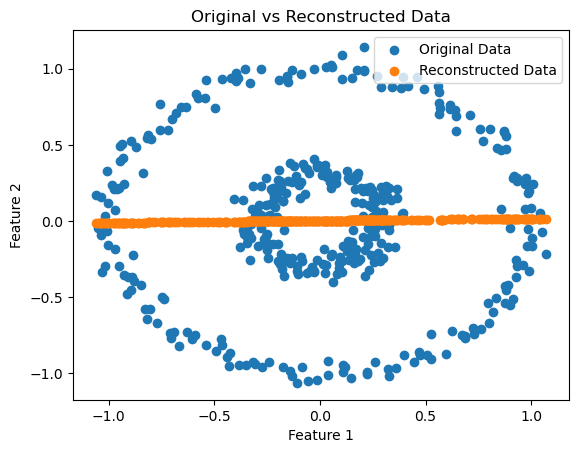

In [269]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

X_transformed = pca.fit_transform(X)

# Inverse transform to reconstruct original data
X_hat = pca.inverse_transform(X_transformed)

print("Shape of X:", X.shape)
print("Shape of X_hat:", X_hat.shape)

# original and reconstructed plots
plt.scatter(X[:, 0], X[:, 1], label='Original Data')
plt.scatter(X_hat[:, 0], X_hat[:, 1], label='Reconstructed Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Original vs Reconstructed Data')
plt.show()

<Axes: xlabel='0'>

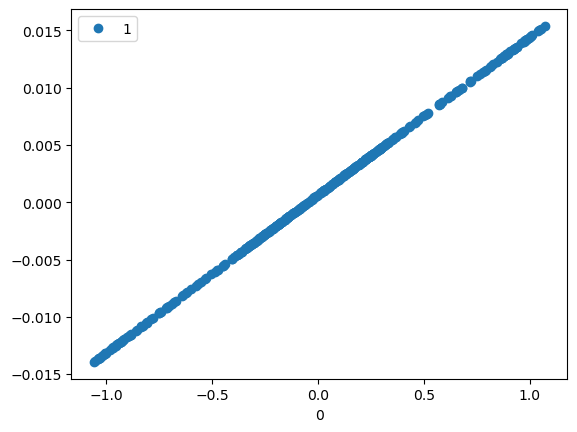

In [27]:
#solution
from sklearn.decomposition import PCA
est = pca = PCA(n_components=1, random_state=42)
X_transformed = pca.fit_transform(X)
X_hat = X_hat = pca.inverse_transform(X_transformed)

pd.DataFrame(X_hat).plot(x=0, y=1, style="o")

---
**Problem 5. Which feature in `cars.csv` has the variance with the highest numerical value?**


In [44]:
df_cars = pd.read_csv("cars.csv")
df_cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Weight_in_lbs
0,12.0,8,307.0,130.0,18.0,3504
1,11.5,8,350.0,165.0,15.0,3693
2,11.0,8,318.0,150.0,18.0,3436
3,12.0,8,304.0,150.0,16.0,3433
4,10.5,8,302.0,140.0,17.0,3449


In [47]:
variances = df_cars.var()
highest_variance_feature = variances.idxmax()
highest_variance_feature 


'Weight_in_lbs'

In [ ]:
#solution
de_cars.std()

---
**Problem 6.** Perform PCA on the `cars.csv` dataset, and find 6 principal components. The data can be transformed by PCA into 6 dimensions. <br>
Now, perform the inverse transform on the transformed data (e.g., `X_hat = inverse_transform(transform(X))`).

**Is the approximation `X_hat` equal to the original data `X`, and why?**

`NOTE:` To check if they are same, we can just subtract the two vectors and find the absolute sum. Round the sum to 2 decimal place and check if its 0.0. If this sum is zero, we'll know that they are same.

In [19]:
df_cars = pd.read_csv("cars.csv")
X = df_cars.values

In [274]:
# PCA with 6 principal components
pca = PCA(n_components=6)

# inverse transform to reconstruct the original data
X_hat = pca.inverse_transform(X_pca)

# Check if X_hat is equal to the original data X
absolute_sum = np.sum(np.abs(X - X_hat))
if round(absolute_sum, 2) == 0.0:
    print("X_hat is equal to the original data X.")
else:
    print("X_hat is not equal to the original data X.")

X_hat is equal to the original data X.


In [21]:
#solution
from sklearn.decomposition import PCA
est = PCA(n_components=6, random_state=42)

X_hat = est.inverse_transform(est.fit_transform(X))

#check
print("Explained Variance:", est.explained_variance_ratio_.sum())

sum(X_hat - X).round(2)

Explained Variance: 1.0


array([-0.,  0.,  0.,  0., -0.,  0.])

---
**Problem 7.** Import the data in the `cars.csv` dataset.

`Part 1` Find the number of principle components required to explain Y% (Y is given to you in Canvas) of the variance.<br>

`Part 2` Standardize the original data using [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Now find the number of principle components required to explain Y% of the variance.

**Does standardizing the data change the number of principal components required to explain Y% of the variance in Parts I and II? If so, please elaborate on why. If not, does this result match your expectations?**

In [22]:
df_cars = pd.read_csv("cars.csv")
X = df_cars.values
df_cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Weight_in_lbs
0,12.0,8,307.0,130.0,18.0,3504
1,11.5,8,350.0,165.0,15.0,3693
2,11.0,8,318.0,150.0,18.0,3436
3,12.0,8,304.0,150.0,16.0,3433
4,10.5,8,302.0,140.0,17.0,3449


In [276]:
#Part-1: Find the number of principal components required to explain 99% of the variance.

from sklearn.decomposition import PCA
embedding = PCA()
embedding.fit(X)

embedding = PCA(n_components = 0.99)
X_low = embedding.fit_transform(X)
embedding.n_components_, embedding.explained_variance_ratio_.sum()


(1, 0.9975535062891329)

In [23]:
#OR
est = PCA(n_components=0.99, random_state=42)
est.fit(X)
est.n_components_


1

In [61]:
#Part-2 
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

embedding = PCA()
embedding.fit(X_scaled)

embedding = PCA(n_components = 0.99)
X_low = embedding.fit_transform(X_scaled)
embedding.n_components_, embedding.explained_variance_ratio_.sum()


(5, 0.9939530000311947)

In [ ]:
#part 2 solution 
SS = StandardScaler()
X_norm = SS.fit_transform(X)

pca= PCA(0.95, random_state=42)
pca.fit(X_norm)
pca.n_components_

In [282]:
#item 2 Q1, Q2
def longest_substring(s):
    max_length = 0
    current_length = 0
    stack = []

    for char in s:
        if char == '{' or char == '[' or char == '(':
            stack.append(char)
            current_length +=1
        elif char == '}' or char == ']' or char == ')':
            if stack and ((char == '}' and stack[-1] == '{') or
                          (char == ']' and stack [-1] == '[') or 
                          (char == ')' and stack [-1] == '(')):
                stack.pop()
                current_length += 1
            else:
                max_length = max(max_length, current_length)
                current_length = 0
                stack = []
        else:
            current_length += 1
    max_length = max(max_length, current_length)
    return max_length

s2 = 'egc[]aGMgzROGwVvc[{(Y{}{})[(){}V]wJX()}](Kf[F]())m)()l)(W){}DgrFPRMSSr[B]X(y{}{}V)zz{}pZ[]j[]T(({}[]V))gqif()DOhW[()]eptUavfWuM([])WggiZvN{}(q)()Y{}Tq'
longest_substring(s2)

95

In [158]:

import numpy as np
from sklearn.decomposition import PCA

def num_components_for_variance(data, k):
    pca = PCA()
    pca.fit(data)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    num_components = np.argmax(cumulative_variance >= k) + 1
    return num_components

# Generate some random data
num_samples = 2000
num_features = 40
random_data = np.random.rand(num_samples, num_features)

# Set the desired minimum variance (e.g., 0.9 for 90% variance)
k = 0.9

required_components = num_components_for_variance(random_data, k)
required_components

35

---